                    Insurance Cost Analysis

In this project, I perform analytics operations on an insurance database using 19,404 data rows to predict the price of insurance policies using the below mentioned parameters.

age: age in years, integer
gender: Male or Female, integer (1 or 2)
bmi: Body mass index, float
no_of_children: Number of children, integer
smoker: Whether smoker or not, integer (0 or 1)
region: Which US region-NW, NE, SW, SE, integer (1,2,3 or 4 respectively)
charges: Annual Insurance charges in USD, float

Objectives
In this project, I will:

Load the data as a pandas dataframe
Clean the data, taking care of the blank entries
Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
Develop single variable and multi variable Linear Regression models for predicting the charges
Use Ridge regression to refine the performance of Linear regression models.

In [27]:
#Importing required libraries
import piplite
await piplite.install('seaborn')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

Import The Dataset

In [28]:
#Loading the data file
file_name="insurance.csv"
df = pd.read_csv(file_name)

In [29]:
#Explore the dataset
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [30]:
#As we can see that this dataset doesn't have column headings
#Add the headers to the dataframe, as mentioned in the project scenario
headers = ["age", "gender", "bmi", "no_of children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [31]:
#Replace the '?' entries with 'NaN' values
df.replace('?',np.nan, inplace = True)

Data Wrangling

In [32]:
#Identify the columns that have some 'Null' (or NaN) information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [33]:
#Handle missing data for "age" and "smoker" column
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace = True)
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean()
df["age"].replace(np.nan, mean_age, inplace=True)
# Update data types
df[["smoker", "age"]] = df[["smoker", "age"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [34]:
#Round up the "charges" values to 2 decimal places
df["charges"] = np.round(df["charges"],2)
df.head()

,age,gender,bmi,no_of children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


Exploratory Data Analysis

In [35]:
#Print the correlation matrix for the dataset to see which independent variable are most related to the variable "charges"
print(df.corr())

                     age    gender       bmi  no_of children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


(0.0, 66902.85800000001)

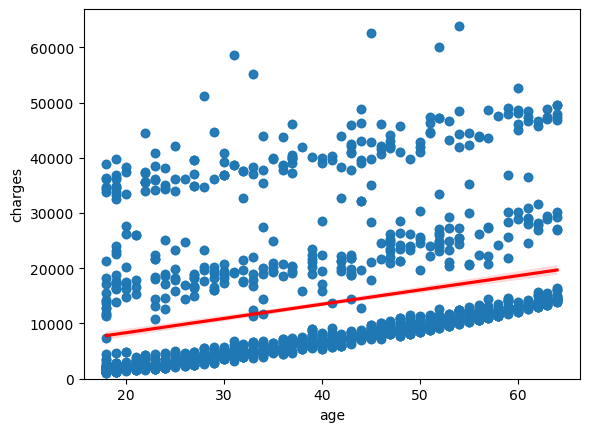

In [36]:
#I chose to investigate the relationship between 'charges' and 'age', 'bmi', and 'smoker' because their correlations with charges appear to be more significant than others.#Implement the regression plot for "charges" with respect to "age"
#Implement the regression plot for "charges" with respect to "age"
sns.regplot(x="age",y="charges", data=df, line_kws={'color':'red'})
plt.ylim(0,)

The scatter plot reveals no relation between "charges" and "age"

(0.0, 66902.85800000001)

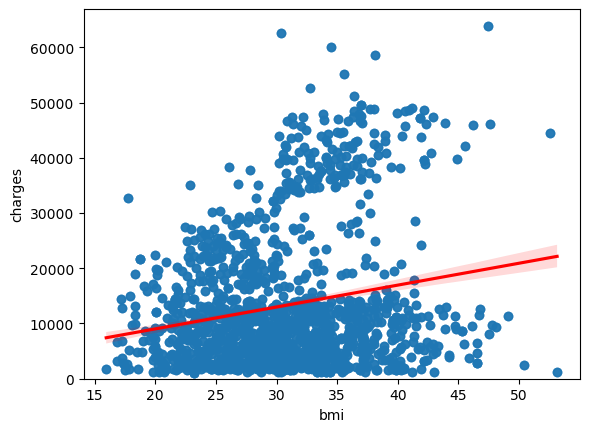

In [37]:
#Implement the regression plot for "charges" with respect to "bmi"
sns.regplot(x="bmi",y="charges", data=df, line_kws={'color':'red'})
plt.ylim(0,)

The plot demonstrates the possitive relationship between "charges" and "bmi". It means that if an insurer had a high bmi, their charges would be high as well, but it is not really significant. Next, an investigation on whether there is any ouliers for smoker variable. Box plot will be used in this case

<AxesSubplot:xlabel='smoker', ylabel='charges'>

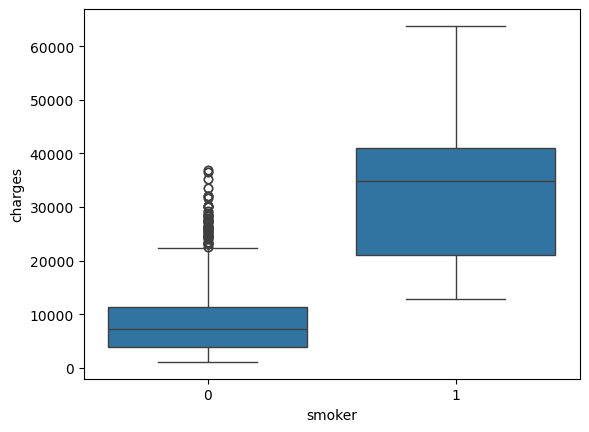

In [38]:
#Implement the box plot for "charges" with respect to "smoker"
sns.boxplot(x="smoker", y="charges", data=df)

The above box plot shows that some non-smoker insurers have irregular charges, indicated by outliers in the '0' box. This could be due to other factors such as high BMI or age.

Model Development
In the EDA section, "smoker" stands out to have the highest correlation with the variable "charges", I decide to examine the relationship between these two variable by calculating the R-Squared value

In [39]:
#Linear Regression is used to investigate the relationship and to confirm its significance by calculating the R-Squared value.
x=df[['smoker']]
y=df[['charges']]
lm=LinearRegression()
lm.fit(x,y)
print(lm.score(x,y))

0.6227430402464125


In [40]:
#Then I consider the relationship of other variables in relation to the charges to see if the R-Squared value improves.
z=df[["age", "gender", "bmi", "no_of children", "smoker", "region"]]
lm.fit(z,y)
print(lm.score(z,y))


0.7505888664568174


As we can see, the R-squared value improves when other independent variables are added to this regression. This indicates that age, gender, BMI, number of children, smoker status, and region all influence insurance charges, though the relationship specifically with smoking is particularly significant.

Imagine building a machine learning project like a recipe. Training pipelines are like automatic kitchen tools that help with all the prep work. They take care of things like cleaning the data (like washing vegetables) and training the model (like cooking). This saves time (no more chopping onions!), makes things consistent every time (perfect cookies every batch!), and lets us easily follow the recipe again later (share your creation with friends!). Pipelines help teams work together smoothly and ensure your experiments are reliable, ultimately leading to a tastier, I mean, a more successful machine learning project!

In this case, I will use this pipeline approach to build a model that predicts "charges," kind of like figuring out the final bill at a restaurant.

In [41]:
#Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create the model. There should be even further improvement in the performance.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))

0.8453681600043882


Model Refinement
The dataset will be split into 80% of the training set and 20% of the test set to test it's reliability

In [42]:
#Split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)


I'm going with Ridge Regression for this analysis because it offers some real benefits, especially when dealing with tricky data.  Here's the thing: sometimes, different pieces of information in your data can be too interconnected, which can mess with traditional regression techniques. Ridge Regression tackles this by adding a penalty that basically pushes the influence of less important factors towards zero. Think of it like dimming the lights on unimportant actors on a stage – they're still there, but they don't steal the show. This helps to prevent the model from overfitting to the specific data we have and allows it to perform better on completely new information. Plus, when there's a lot of overlap between data points, Ridge Regression can handle it gracefully by spreading the influence around, leading to more stable and reliable results. So, Ridge Regression seems like the perfect tool for the job!

I went with an alpha value of 0.1 for this model. Here's why: it gives us a nice middle ground between complexity and preventing overfitting. Alpha acts like a control knob for how much we penalize the model for having big coefficients. A higher alpha would hit those hard, potentially shrinking them too much. But with 0.1, I can still keep some complexity in the model while making sure it doesn't get too hung up on any one feature. This way, the model can learn without becoming overly simplified.

I decided to go with a degree-2 polynomial transformation for training the model's parameters. Here's why it makes sense: sometimes, the data we work with has hidden relationships that aren't straight lines. A regular model wouldn't be able to capture those curves and bends. By throwing in squared terms and interactions between features, this transformation basically gives the model more tools to play with. It can bend and twist to fit the data better, while still keeping things clear enough for us to understand what's going on. This sweet spot of flexibility and interpretability often leads to a model that predicts well on both the data it trained on and completely new stuff. And to make sure we haven't overcooked it, I'll use cross-validation to confirm the best degree choice. That way, the model can learn from the data without getting stuck on memorizing one specific set.


In [43]:
#Initialize a Ridge regressor that used hyperparameter alpha = 0.1. Fit the model using training data data subset. Print the R-Squared score for the testing data.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412217


For this model, Iused a neat trick called polynomial transformation. Basically, imagine the data points aren't following a straight line, but curving or bending in unexpected ways. A regular model wouldn't be able to handle those twists. This transformation lets the model create more complex shapes by turning the data points into higher-powered versions of themselves. Think of it like squaring them or multiplying them together. This flexibility allows the model to fit the data much better, potentially leading to more accurate predictions. It also prevents the model from being too simple and missing important patterns. This is especially helpful when the data itself isn't a straight line. In the end, this technique helps us understand the data's hidden dynamics and build a model that predicts things way more effectively.


In [44]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R-Squared score for the testing subset.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413195172275


In [24]:
#Apply polynomial transformation to the training parameters with degree=3. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R-Squared score for the testing subset.
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8246833751477002


After applying polynomial transformations with degrees 2 and 3, the R-squared scores did not show significant improvement. Therefore, I decided to finalize the analysis by selecting the degree 2 model to avoid unnecessary complexity that could lead to overfitting. This model has been chosen for deployment.

Thank you for taking the time to review this project. Any valuable feedback is appreciated, and please feel free to connect with me for further discussion.